# Classfication

This notebook evaluates methods for classification using the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump.

## Table of Contents
* [Data import](#data_import)
* [Classfication methods for the binary case](#classification_binary)
* [Classfication methods for the multi-label case](#classification_multi)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import time
from joblib import dump, load
from academia_tag_recommender.definitions import MODELS_PATH

<a id='data_import'/>

## Data import

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from academia_tag_recommender.preprocessor import BasicPreprocessor
from academia_tag_recommender.tokenizer import BasicTokenizer, EnglishStemmer, PorterStemmer, LancasterStemmer, Lemmatizer
from academia_tag_recommender.test_train_data import get_X_y, get_test_train_data

X, y = get_X_y(TfidfVectorizer, BasicTokenizer, BasicPreprocessor, None, (1, 1))
X_train, X_test, y_train, y_test = get_test_train_data(X, y, multi=False)

Received saved model


<a id='classification_binary'/>

## Classification methods for the binary case

Probabilistic algorithms (high dimensionality, data sparsity)
- Naive Bayes (NB), [Explanation](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [Explanation](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- Linear Classifier (LLSF: Linear Least Squares Fit), [Explanation](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)


Geometric algorithms
- [k-Nearest Neighbor (kNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier), [Explanation](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
- [Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [Explanation](https://scikit-learn.org/stable/modules/svm.html)


- [Neural Network (NN)](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier), [Explanation](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)


In [3]:
from academia_tag_recommender.classifier_computation import test_classifier, load_results, dump_results

In [4]:
X_train_one_feat = X_train[:,1].toarray()
X_test_one_feat = X_test[:,1].toarray()

def plot_decision(clf):
    clf_fit = clf.fit(X_train_one_feat, y_train)
    y_pred = clf_fit.predict(X_test_one_feat)
    
    plt.scatter(X_test_one_feat, y_test,  color='black')
    plt.plot(X_test_one_feat, y_pred, color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()

**Naive Bayes**

>Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.
>[scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html)

The different Naive Bayes classifier differ in terms of the likelihood of a feature.

- [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
    >The likelihood of the features is assumed to be Gaussian
    >[scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)
    
- [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
    >implements the naive Bayes algorithm for multinomially distributed data
    >[scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes)

- [Complement Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB)
    >CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model’s weights. [...] Further, CNB regularly outperforms MNB (often by a considerable margin) on text classification tasks.
    >[scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes)

- [Categorical Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB)
    >implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature, which is described by the index , has its own categorical distribution.
    >[scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes)



Multinomial Naive Bayes, Complement Naive Bayes and Categorical Naive Bayes use `alpha` as a parameter for smoothing.
> Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

In [5]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB

*Gaussian Naive Bayes*

In [6]:
test_classifier('Gaussian Naive Bayes', 
                GaussianNB(),
                X_train.toarray(), y_train,
                X_test.toarray(), y_test)

               Pred true      Pred false     
Orig true      11             87             
Orig false     488            7685           


*Multinomial Naive Bayes*

In [7]:
test_classifier('Multinomial Naive Bayes', 
                MultinomialNB(), 
                X_train.toarray(), y_train, 
                X_test.toarray(), y_test)

               Pred true      Pred false     
Orig true      2              96             
Orig false     85             8088           


*Complement Naive Bayes*

In [8]:
test_classifier('Complement Naive Bayes', 
                ComplementNB(), 
                X_train.toarray(), y_train, 
                X_test.toarray(), y_test)

               Pred true      Pred false     
Orig true      8              90             
Orig false     204            7969           


*Categorical Naive Bayes*

In [ ]:
test_classifier('Categorical Naive Bayes', 
                CategoricalNB(), 
                X_train.toarray(), y_train,
                X_test.toarray(), y_test)

**Logistic Regression**

> Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.
> [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
test_classifier('Logistic Regression', 
                LogisticRegression(random_state=0), 
                X_train, y_train, 
                X_test, y_test)

               Pred true      Pred false     
Orig true      2              96             
Orig false     0              8173           


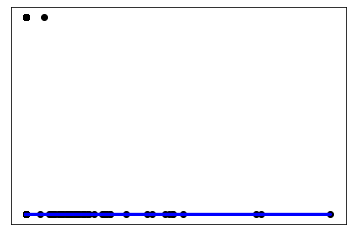

In [12]:
plot_decision(LogisticRegression(random_state=0))

**Linear Regression**

> LinearRegression fits a linear model with coefficients
to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. 
> [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

- [Ordinary Least Squares](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier)
     imposes a penalty on the size of the coefficients
- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskLasso.html#sklearn.linear_model.MultiTaskLasso)
    estimates sparse coefficients
- [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)
    >linear regression model trained with both l1 and l2 -norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of
and using the l1_ratio parameter.
    > [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)

In [13]:
from sklearn.linear_model import LinearRegression, RidgeClassifier, MultiTaskLasso, Lasso, MultiTaskElasticNet, ElasticNet

*Ordinary Least Squares*

In [15]:
test_classifier('Ordinary Least Squares', 
                LinearRegression(),
                X_train, y_train, 
                X_test, y_test,
                use_score=False)

               Pred true      Pred false     
Orig true      15             83             
Orig false     1001           7172           


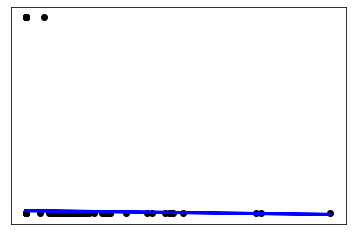

In [16]:
plot_decision(LinearRegression())

*Ridge Regression*

In [17]:
test_classifier('Ridge Classifier',
                RidgeClassifier(),
                X_train, y_train, 
                X_test, y_test)

               Pred true      Pred false     
Orig true      3              95             
Orig false     26             8147           


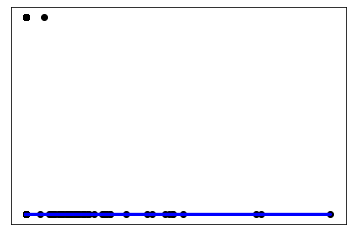

In [18]:
plot_decision(RidgeClassifier())

*Lasso*

In [19]:
test_classifier('Lasso',
                Lasso(),
                X_train, y_train, 
                X_test, y_test,
                use_score=False)

               Pred true      Pred false     
Orig true      0              98             
Orig false     0              8173           


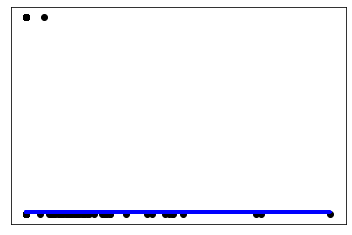

In [20]:
plot_decision(Lasso())

*Elastic Net*

In [21]:
test_classifier('Elastic Net',
                ElasticNet(),
                X_train, y_train, 
                X_test, y_test,
                use_score=False)

               Pred true      Pred false     
Orig true      0              98             
Orig false     0              8173           


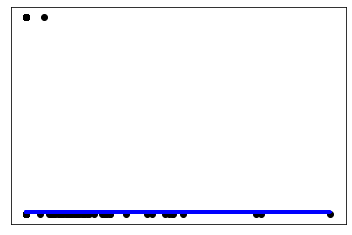

In [23]:
plot_decision(ElasticNet())

**Decision Trees**

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
test_classifier('DecisionTree',
                DecisionTreeClassifier(),
                X_train, y_train, 
                X_test, y_test)

               Pred true      Pred false     
Orig true      4              94             
Orig false     82             8091           


**k-Nearest Neighbors**

> Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
> [scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
test_classifier('k-Nearest Neighbors',
                KNeighborsClassifier(),
                X_train.toarray(), y_train, 
                X_test.toarray(), y_test)

               Pred true      Pred false     
Orig true      0              98             
Orig false     0              8173           


**Support Vector Machines**

> A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.
> [scikit-learn](https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation)

- [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC)
- [Linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)


In [26]:
from sklearn.svm import SVC, NuSVC, LinearSVC

*SVC*

In [27]:
test_classifier('SVC',
                SVC(),
                X_train, y_train, 
                X_test, y_test)

               Pred true      Pred false     
Orig true      0              98             
Orig false     0              8173           


*NuSVC*

In [28]:
test_classifier('NuSVC',
                NuSVC(),
                X_train, y_train, 
                X_test, y_test)

               Pred true      Pred false     
Orig true      1              97             
Orig false     0              8173           


*Linear SVC*

In [29]:
test_classifier('Linear SVC',
                LinearSVC(),
                X_train, y_train, 
                X_test, y_test)

               Pred true      Pred false     
Orig true      5              93             
Orig false     19             8154           


**Neural Networks**

> Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function
by training on a dataset, where is the number of dimensions for input and is the number of dimensions for output. Given a set of features
and a target , it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers.
> [scikit-learn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron)


In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
test_classifier('Neural Network',
                MLPClassifier(),
                X_train, y_train,
                X_test, y_test)

               Pred true      Pred false     
Orig true      4              94             
Orig false     20             8153           


**Results**

In [35]:
results = load_results()
print('{:<30}{:<25}{:<25}{:<25}'.format("Classifier", "Train Score", "Test Score", "Time"))
for result in results:
    [name, score_orig, score_pred, process_time] = result
    print('{:<30}{:<25}{:<25}{:<25}'.format(name, score_orig, score_pred, process_time))

Classifier                    Train Score              Test Score               Time                     
Gaussian Naive Bayes          0.9456289548990368       0.9304799903276508       94.37618041038513        
Multinomial Naive Bayes       0.9860948772721777       0.978116309998791        4.103748559951782        
Complement Naive Bayes        0.9815404457700213       0.9644541167936163       4.130535125732422        
Categorical Naive Bayes       0.9983072365636902       0.9991536182818451       43.95118808746338        
Logistic Regression           0.9908911369956874       0.9883931809938339       1.0477983951568604       
Ordinary Least Squares        0.9989708991608368       -2.009146247158252       473.6501157283783        
Non Negative Least Squares    0.0007553841720261186    0.0018232107135137264    8281.4295399189          
Ridge Classifier              0.996574100197493        0.9853705718776448       0.8766429424285889       
Lasso                         0.98789749705711

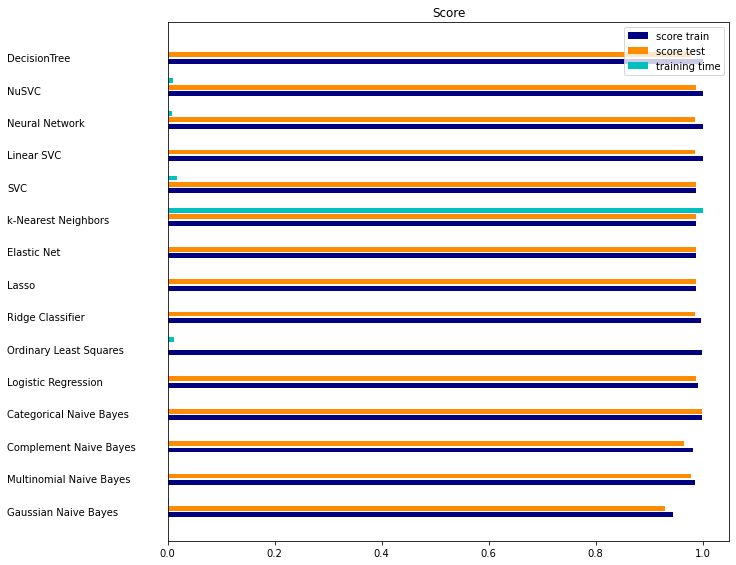

In [36]:
results_ = [[x[i] for x in load_results() if x[0] != 'Non Negative Least Squares'] for i in range(4)]
indices = np.arange(len(results_[0]))

clf_names, score_orig, score_pred, proc_time = results_
proc_time = np.array(proc_time) / np.max(proc_time)
score_pred = [score if score > 0 else 0 for score in score_pred]

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score_orig, .15, label="score train", color='navy')
plt.barh(indices + .2, score_pred, .15, label="score test", color='darkorange')
plt.barh(indices + .4, proc_time, .15, label="training time",
         color='c')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

<a id='classification_multi'/>

## Classification methods for the multi-label case

Classification methods can be adapted to the multi-label case, by splitting the multi-label problem with *n* labels into *n* binary problems.
Scikit-learn offers the class [`MultiOutputClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html?highlight=multioutput#sklearn.multioutput.MultiOutputClassifier) for expanding binary classifiers.


Other approaches to multi-label classification are discussed in other notebooks:
- [Algorithm Adaption](./me-algorithm-adaption.ipynb)
- [Problem Transformation](./me-problem-transformation.ipynb)
- [Ensemble](./me-ensemble.ipynb)

In [22]:
from sklearn.multioutput import MultiOutputClassifier

X_train_multi, X_test_multi, y_train_multi, y_test_multi = get_test_train_data(X, y, multi=True)

In [25]:
test_classifier('Multioutput - Linear SVC', 
                MultiOutputClassifier(LinearSVC()),
                X_train_multi, y_train_multi,
                X_test_multi, y_test_multi,
                multi=True)

[[[8261    0]
  [   3    0]]

 [[8253    0]
  [  11    0]]

 [[8238    4]
  [  16    6]]

 ...

 [[8239    4]
  [  10   11]]

 [[7908  113]
  [ 192   51]]

 [[8126   24]
  [ 100   14]]]


In [37]:
results = load_results(multi=True)
print('{:<40}{:<25}{:<25}{:<25}'.format("Classifier", "Train Score", "Test Score", "Time"))
for result in results:
    [name, score_orig, score_pred, process_time] = result
    print('{:<40}{:<25}{:<25}{:<25}'.format(name, score_orig, score_pred, process_time))

Classifier                              Train Score              Test Score               Time                     
Multioutput - Multinomial Naive Bayes   0.035257573923917866     0.014036786060019362     1261.7157561779022       
Multioutput - Lasso                     0.9966151566607464       0.995690431741345        119350.97936415672       
Multioutput - Elastic Net               0.9940876900072511       0.994085906724229        218.83601474761963       
Multioutput - Linear SVC                0.9745451611601921       0.05542110358180058      1752.2562556266785       
Multioutput - Logistic Regression       0.28504578643753276      0.06667473378509196      6249.087834358215        
Multioutput - Gaussian Naive Bayes      0.4326919198031385       0.003993223620522749     11845.353125572205       
Multioutput - Complement Naive Bayes    0.044051797168098754     0.018151016456921586     1257.9403433799744       


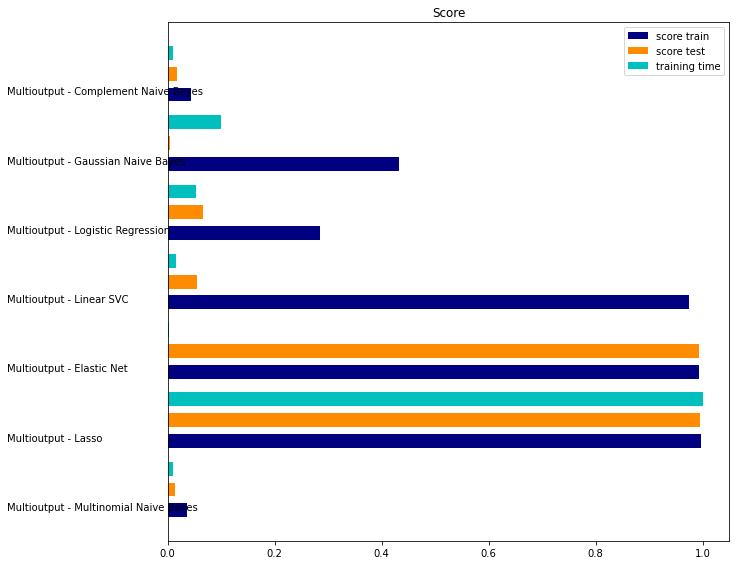

In [38]:
results_ = [[x[i] for x in load_results(multi=True)] for i in range(4)]
indices = np.arange(len(results_[0]))

clf_names, score_orig, score_pred, proc_time = results_
proc_time = np.array(proc_time) / np.max(proc_time)
score_pred = [score if score > 0 else 0 for score in score_pred]

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score_orig, .2, label="score train", color='navy')
plt.barh(indices + .3, score_pred, .2, label="score test", color='darkorange')
plt.barh(indices + .6, proc_time, .2, label="training time",
         color='c')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()